Biel González Garriga NIU: 1551813

Judit Panisello Lozano NIU: 1605512

Cristina Soler Arenys NIU: 1603542

In [22]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
from Tools import *
import time as time

In [23]:
def load_dataset(path):
    df = pd.read_csv(path, header=0, delimiter=',')
    return df

df = load_dataset('forestfires.csv')
data = df.values

## Analisi del dataset

In [6]:
print("Dimensionalitat de la BBDD:", df.shape)

Dimensionalitat de la BBDD: (517, 13)


Veiem que tenim 512 entrades al dataset i que cada entrada te 13 atributs.

Les entrades tenen l'aspecte següent:

In [7]:
df.head() 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Si fem servir df.describe() podem veure un anàlisi ràpid de les dades de cada columna

In [8]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Neteja del dataset
Primer mirem si hi ha valors nulls al dataset

In [9]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

Veiem que no hi ha valors nulls i que per tant per aquesta banda ja hem acabat. Així que seguirem revisant els outliers del dataset per veure si s'ha de treure cap entrada que contingui errors

In [10]:
df=df.replace(df['month'].unique(),[3,10,8,9,4,6,7,2,1,12,5,11]).replace(df['day'].unique(),[5,2,6,7,1,3,4])

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

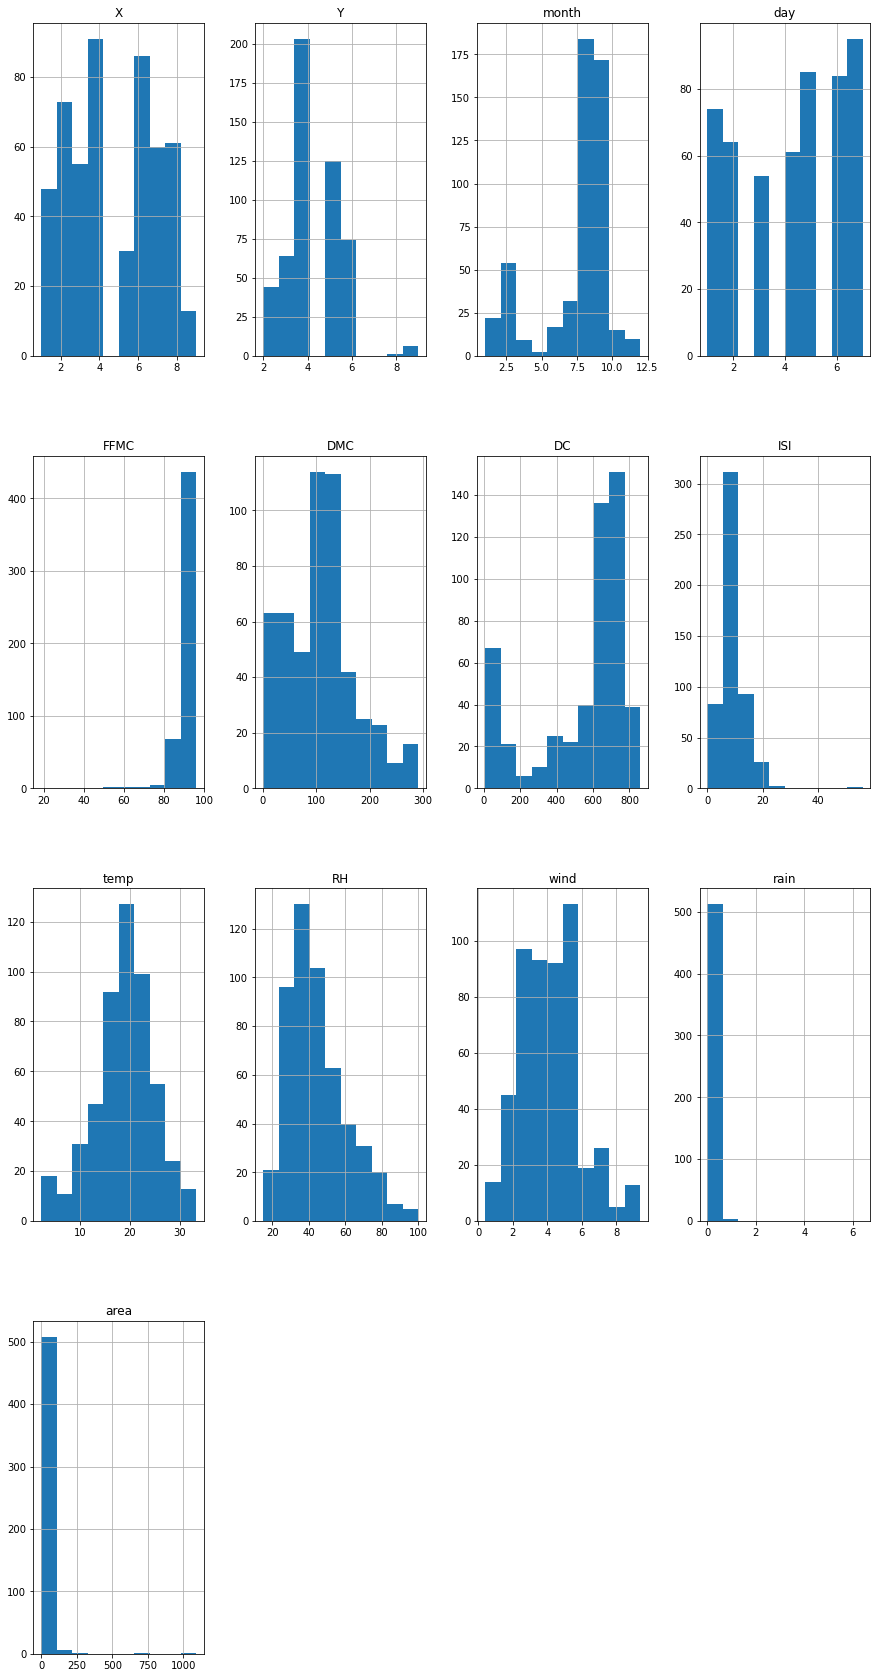

In [11]:
df.hist(figsize=(15,30))

Veiem que tenim outliers en diverses gràfiques: Rain, area, ISI, FFMC. Tot i així no els podem treure del dataset ja que no son errors de mesura son dies mesurats amb condicions mes extremes.

Normalitzarem les dades per facilitar el treball que farem posteriorment amb el dataset

array([[<AxesSubplot:title={'center':'X'}>,
        <AxesSubplot:title={'center':'Y'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>],
       [<AxesSubplot:title={'center':'area'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

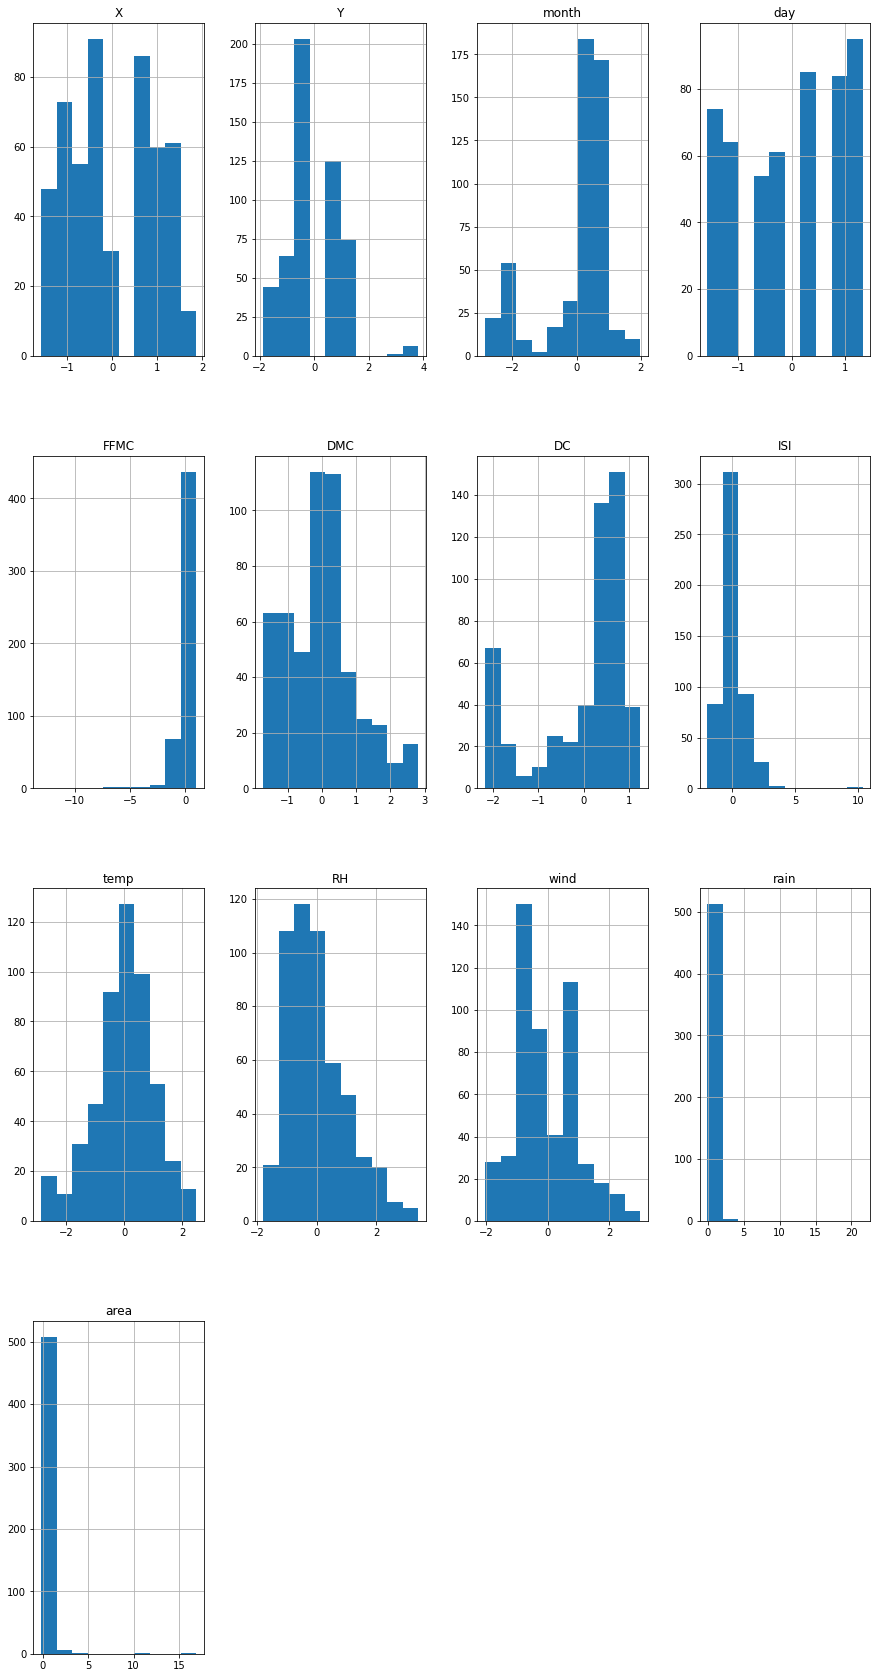

In [12]:
dfn=df.copy()
dfn=normalize(dfn)
dfn.hist(figsize=(15,30))

### Anàlisi de correlació

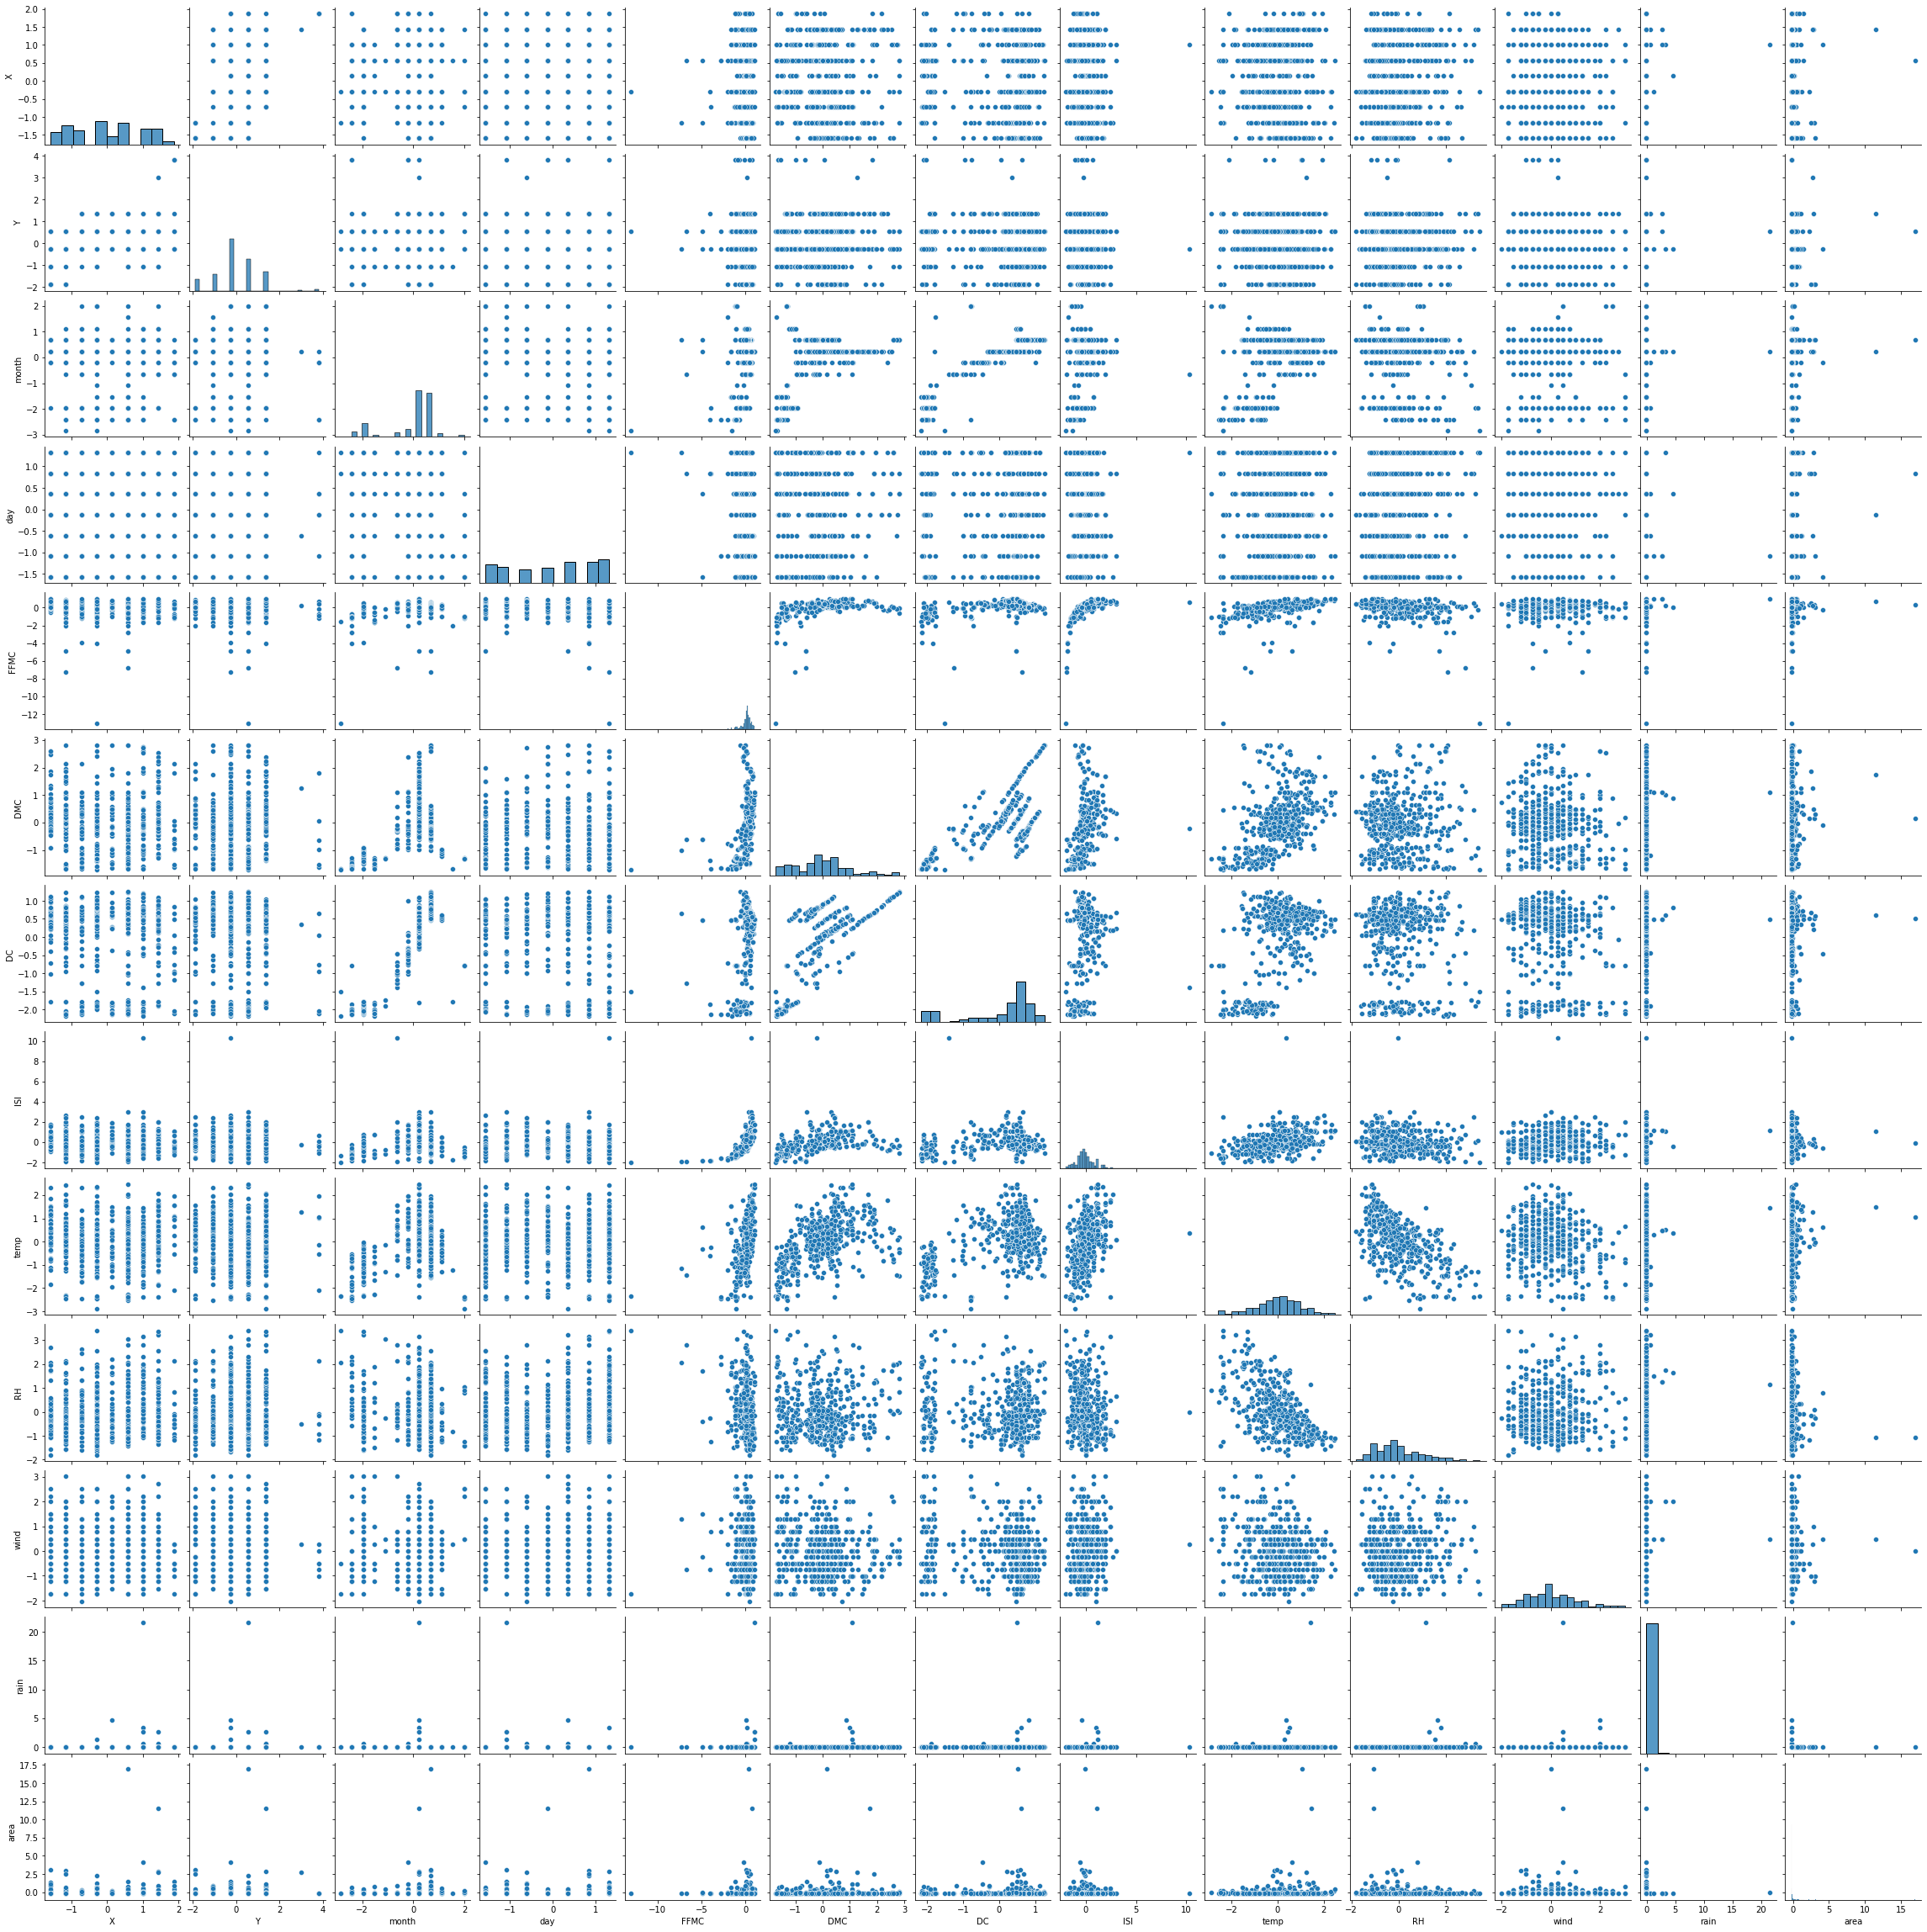

In [13]:
pairPlt = sns.pairplot(dfn)

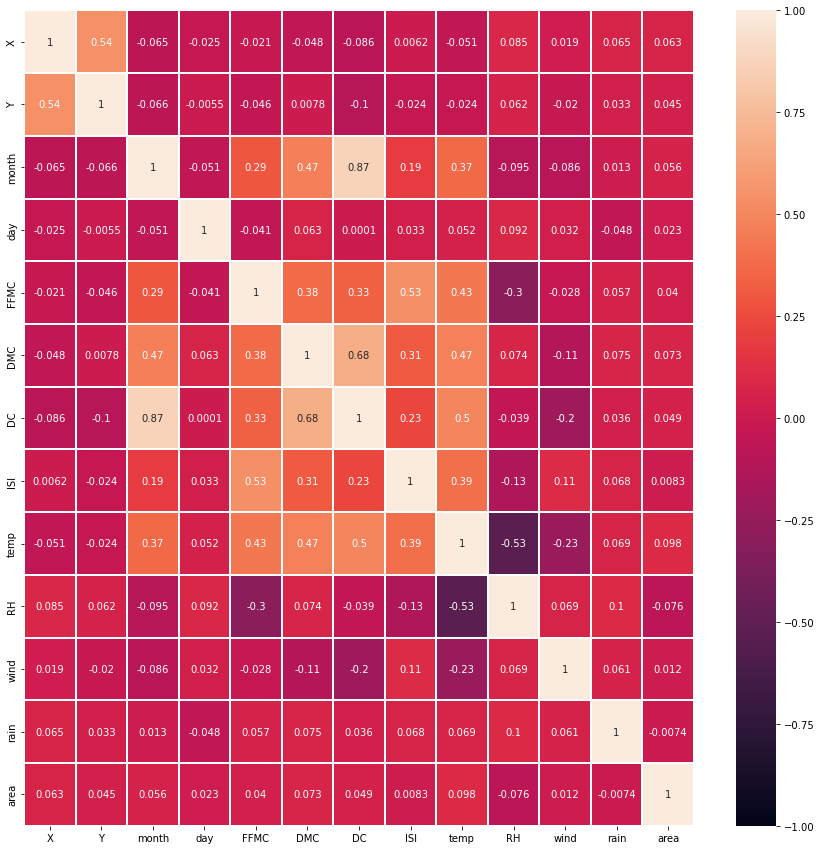

In [19]:
corr=dfn.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(corr,annot=True,linewidth=2,vmin=-1.0,vmax=1.0)

In [20]:
corr["area"]

X        0.063385
Y        0.044873
month    0.056496
day      0.023226
FFMC     0.040122
DMC      0.072994
DC       0.049383
ISI      0.008258
temp     0.097844
RH      -0.075519
wind     0.012317
rain    -0.007366
area     1.000000
Name: area, dtype: float64

## 1.1 Classes de les variables

Tenim 13 variables diferents per a cada entrada de la base de dades i son dels següents tipus:

In [16]:
df.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

## 1.2 Possibles gaussianes

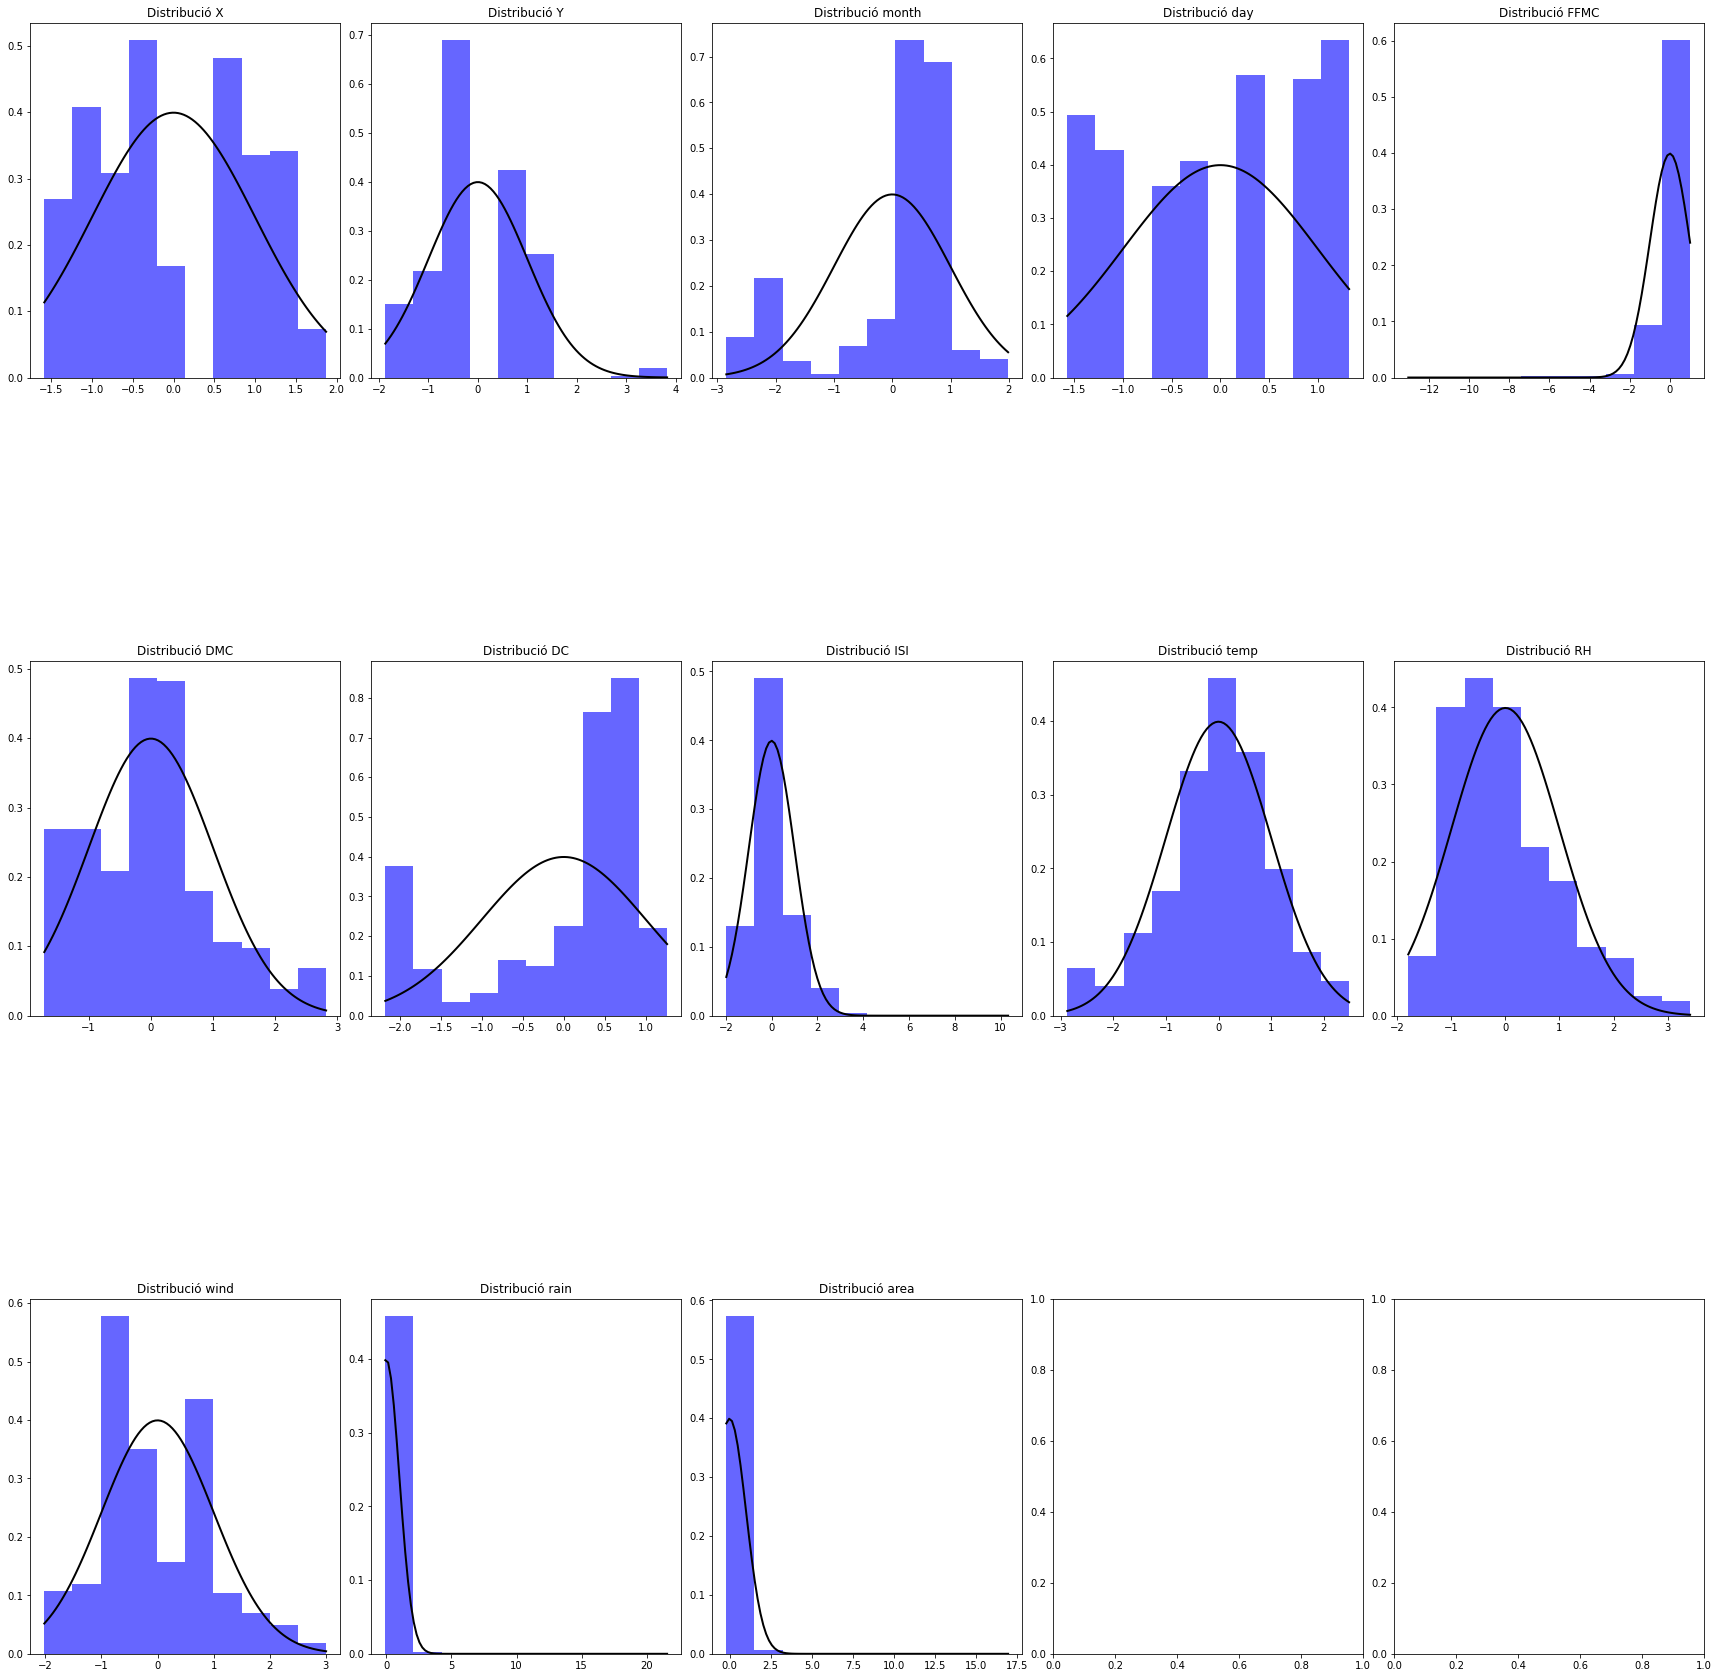

In [24]:
fig, ax = plt.subplots(3,5,figsize=(30,30))
i=0
j=0
for col in dfn.columns:
    dc = dfn[col]
    
    mu, std = stats.norm.fit(dc) 
    x = np.linspace(min(dc), max(dc), 100)
    p = stats.norm.pdf(x, mu, std)
    
    ax[i,j].plot(x, p, 'k', linewidth=2)
    ax[i,j].hist(dc, density=True, alpha=0.6, color='b')
    ax[i,j].set_title("Distribució " +col)
    
    j = j+1
    if j == 5:
        j = 0
        i = i+1

plt.subplots_adjust(hspace=0.8, wspace = 0.10)
plt.show(-1)

### Després de fer un histograma de cada parametre podem veure com les dades els atributs següents segueixen tots una distribucio normal o gaussiana:

La temperatura i l'ISI molt segurament segueixen una gaussiana. I l'humitat relativa (RH) podria ser que també, però està desplaçada.

## 1.3 Atribut objectiu
Creiem que l'atribut objectiu es l'area ja que es l'atribut que mes interessant a analitzar segons les condicions mesurades que ens dona el dataset i així poder predir sota unes noves condicions l'abast d'un incendi.
Tot i així creiem que una regressió lineal simple no seria útil per fer aquesta anàlisi.